In [323]:
import os
import glob
import subprocess
from concurrent.futures import ThreadPoolExecutor
from multiprocessing import freeze_support
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [324]:
!rm -rf ./out
!mkdir ./out

In [325]:
cur_dir = %pwd

In [326]:
in_files = glob.glob(os.path.join(cur_dir, 'in', '*.txt'))
test_cases = [os.path.basename(f) for f in in_files]   

In [327]:
df = pd.read_csv("test_res.csv", index_col=0)
d = {}

In [328]:
def exec(in_file: str):
    out_file = os.path.join(cur_dir, 'out', os.path.basename(in_file))
    res = subprocess.run(f"./main < {in_file} > {out_file}", shell=True, stderr=subprocess.PIPE)
    s = res.stderr.decode('utf-8').strip().split('\n')[-1].strip()
    test_case = os.path.basename(in_file)
    d[test_case] = int(s)

In [329]:
freeze_support()
with ThreadPoolExecutor(max_workers=50) as executor:
    executor.map(exec, in_files)

cur_time = datetime.datetime.now().isoformat()
df[cur_time] = d

In [330]:
df = df.sort_index()

In [331]:
df.to_csv("test_res.csv")

In [332]:
df = df.iloc[:, -5:]

In [333]:
df.describe()

,2023-12-23T13:46:11.587411,2023-12-23T13:50:00.901757,2023-12-23T17:58:30.100644,2023-12-25T16:44:56.135549,2023-12-25T17:03:55.887693
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,2.109494e+07,2.370969e+07,2.571228e+07,4.375213e+07,4.211156e+07
std,1.815398e+08,1.833638e+08,1.999032e+08,3.330979e+08,3.205214e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,1.491000e+03,1.130000e+02
25%,1.317625e+04,2.771825e+04,2.726175e+04,2.624800e+04,2.999100e+04
50%,6.039150e+04,1.300240e+05,1.363590e+05,1.740755e+05,2.048825e+05
75%,4.794680e+05,9.573105e+05,1.020852e+06,1.218528e+06,1.428187e+06
max,3.359002e+09,3.359002e+09,3.359002e+09,5.358368e+09,5.523177e+09


In [334]:
df.iloc[:, -1].mean()

42111562.532

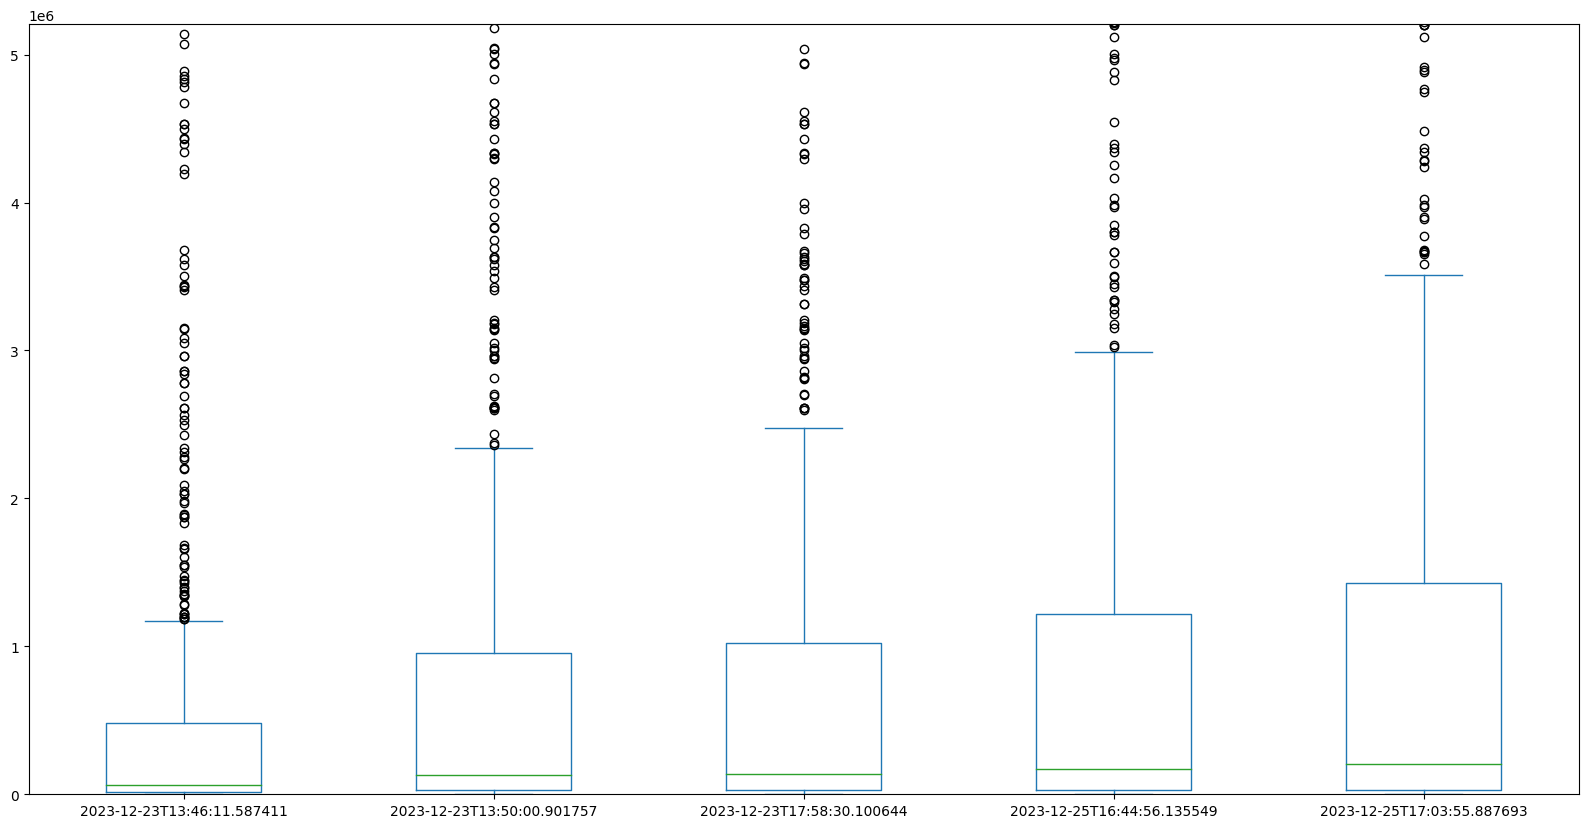

In [335]:
df.plot(kind="box", figsize=(20, 10))
plt.ylim(0, df.quantile(0.85).max())
plt.show()

In [336]:
df.sort_values(by=[cur_time], ascending=False)

,2023-12-23T13:46:11.587411,2023-12-23T13:50:00.901757,2023-12-23T17:58:30.100644,2023-12-25T16:44:56.135549,2023-12-25T17:03:55.887693
0369.txt,3359001574,3359001574,3359001574,5358368249,5523176969
0684.txt,271414119,509440871,509440871,4307432005,4307432005
0517.txt,2090997431,2090997431,2090997431,2249984547,3775518883
0759.txt,2775656978,2775656978,2775656978,4883099218,3337804106
0935.txt,1404644707,1404644707,2337570899,3084933804,3084933803
...,...,...,...,...,...
0182.txt,1787,1787,4643,1491,1755
0709.txt,1173,3625,3619,1515,1523
0837.txt,258510,402894,402894,313434,486
0151.txt,363,363,84603,91663,399
